In [127]:
#imports
#numpy pandas scipy math matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

#estimators 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#cross validation
from sklearn.model_selection import train_test_split

In [77]:
#Models
C=1
modelSVR = svm.SVC(kernel='linear', C=C)
modelRF = RandomForestClassifier(n_estimators = 100, max_depth = 10, min_samples_leaf = 5)
modelLR = LinearRegression()
modelKNN = KNeighborsClassifier(n_neighbors=3)


In [128]:
mm_scaler = preprocessing.MinMaxScaler()

# PAY_6 sample data

In [24]:
#data
rawData = pd.read_csv('default of credit card clients.csv', header=1)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [25]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [26]:
#######training and testing sample data##########

In [27]:
#features
features = rawData.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [28]:
#dependent variable
depVar = rawData['PAY_AMT6']

In [29]:
#Training Set (Feature Space: X Training)
X_train = (features[: 1000])
X_train.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [30]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1000


0       0
1    2000
2    5000
3    1000
4     679
Name: PAY_AMT6, dtype: int64

In [31]:
#Testing Set (X Testing)
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
       BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
29900      16809          0          0          0          0          0   
29901      50845      48750     103486      50590      50248      49387   
29902      10392     168088     168955     161351     126198     124746   
29903      27378      17082      13333         99         99     172104   
29904      54952      56021      54126      58732      59306      59728   

       PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  
29900         0         0         0         0         0  
29901         0      6556      3250      1563      1208  
29902    168096      6409      7335      4448      4519  
29903     10018     13333        99        99    172104  
29904      2600      4553      5800      2000      1000  


In [32]:
#Ground Truth (y_test) 
y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 100


29900        0
29901      781
29902     5003
29903    30013
29904     1462
Name: PAY_AMT6, dtype: int64

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [34]:
X_train.shape, X_test.shape

((750, 11), (250, 11))

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((562, 11), (188, 11))

In [36]:
model = LinearRegression(n_jobs=10)

In [13]:
#Models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

In [59]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10, normalize=False)

In [39]:
modelRF.fit(X_train,y_train)



C:\Users\garre\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [40]:
modelSVR.fit(X_train,y_train)



C:\Users\garre\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [41]:
modelLR.fit(X_train,y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
print(cross_val_score(modelRF, X_train, y_train))

C:\Users\garre\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[-7.52362214  0.05176852 -0.93920572]


In [60]:
#Model Fitting
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

[-3.47119278  0.05799688 -0.84328512]


C:\Users\garre\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\garre\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.8397556295999556

In [61]:
modelSVR.fit(X_train,y_train)
print(cross_val_score(modelSVR, X_train, y_train)) 
modelSVR.score(X_train,y_train)

[-0.05268845 -0.02573774 -0.08313666]


C:\Users\garre\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\garre\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\garre\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\garre\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma

-0.02176578803570073

In [45]:
modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train)) 
modelLR.score(X_train,y_train)

[-6.09670052  0.06649196 -4.19353195]


C:\Users\garre\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.5761261715727543

In [46]:
predictions = modelRF.predict(X_test)



In [47]:
rmse = sqrt(mean_squared_error(y_test, predictions))
print(rmse)

10438.060278702398


In [48]:
predRsquared = r2_score(y_test,predictions)

In [62]:
#Make Predictions
predictions = modelRF.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.509
RMSE: 12300.121


In [42]:
plt.scatter(y_test, predictions, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

NameError: name 'y_test' is not defined

# Credit One Evaluation

In [52]:
#preprocessing 
credit = pd.read_csv('default of credit card clients.csv', header=1)

In [53]:
X = credit.iloc[:,0:24]
print('Summary independent variables')
X.head()

Summary independent variables


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [54]:
y = credit['default payment next month']

# Out of the Box Evaluation

In [55]:
#Dependent Variable Training Set (y Training)
y_training = y[: 22500]
y_training_count = len(y_training.index)
print('The number of observations in the Y training set:',str(y_training_count))
y_training.head()

The number of observations in the Y training set: 22500


0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

In [56]:
#Training Set (Feature Space: X Training)
X_training = (X[: 22500])
X_training.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [57]:
#Ground Truth (y_test) 
y_testing = y[-7500:]
y_testing_count = len(y_testing.index)
print('The number of observations in the Y training set are:',str(y_testing_count))
y_testing.tail()

The number of observations in the Y training set are: 7500


29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, dtype: int64

In [58]:
#Testing Set (X Testing)
X_testing = X[-7500:]
X_testing_count = len(X_testing.index)
print('The number of observations in the feature testing set is:',str(X_testing_count))
print(X_testing.tail())

The number of observations in the feature testing set is: 7500
          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4    ...     BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
29995      0    ...        208365      88004      31237      15980      8500   
29996     -1    ...          3502       8979       5190          0      1837   
29997     -1    ...          2758      20878      20582      19357         0   
29998      0    ...         76304      52774      11855      48944     85900   
29999      0    ...         49764      36535      32428      1

# Out of the Box Random Forest

In [59]:
modelRF.fit(X_training,y_training)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
#random forest
print(cross_val_score(modelRF, X_training, y_training))
modelRF.score(X_training,y_training)

C:\Users\garre\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.80746667 0.8084     0.83      ]


0.8464

In [61]:
#Prediction and evaluating results Random Forest
RFfit1 = modelRF.predict(X_testing)
#RFfit1Rsquared = r2_score(y_testing, RFfit1)
#RFfit1rmse = sqrt(mean_squared_error(y_testing, RFfit1))
#print('R Squared: %.3f' % RFfit1Rsquared)
#print('RMSE: %.3f' % RFfit1rmse)
accuracy_score(y_testing.values, RFfit1)

0.8348

In [143]:
print(confusion_matrix(y_testing, RFfit1))
print(classification_report(y_testing, RFfit1))

[[5732  220]
 [1019  529]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      5952
           1       0.71      0.34      0.46      1548

   micro avg       0.83      0.83      0.83      7500
   macro avg       0.78      0.65      0.68      7500
weighted avg       0.82      0.83      0.81      7500



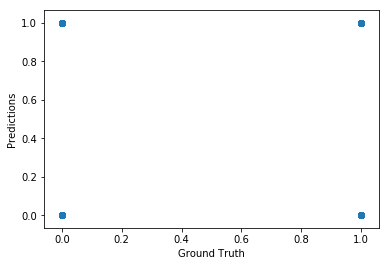

In [62]:
plt.scatter(y_testing, RFfit1, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

# Out of the Box Support Vector Machines

In [66]:
modelSVR.fit(X_training,y_training)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [67]:
#NORMALIZE DATA BEFORE USING SVM MINMAXSCALER
#SVR
print(cross_val_score(modelSVR, X_training, y_training))
modelSVR.score(X_training,y_training)

C:\Users\garre\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.7644     0.77226667 0.77706667]


0.7719111111111111

In [68]:
#Prediction and evaluating results Support Vector
SVRfit1 = modelSVR.predict(X_testing)
#SVRfit1Rsquared = r2_score(y_testing, SVRfit1)
#SVRfit1rmse = sqrt(mean_squared_error(y_testing, SVRfit1))
#print('R Squared: %.3f' % SVRfit1Rsquared)
#print('RMSE: %.3f' % SVRfit1rmse)

accuracy_score(y_testing.values, SVRfit1)


0.7916

In [142]:
print(confusion_matrix(y_testing, SVRfit1))
print(classification_report(y_testing, SVRfit1))

[[5740  212]
 [1351  197]]
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      5952
           1       0.48      0.13      0.20      1548

   micro avg       0.79      0.79      0.79      7500
   macro avg       0.65      0.55      0.54      7500
weighted avg       0.74      0.79      0.74      7500



# Out of the Box K Nearest Neighbor

In [78]:
modelKNN.fit(X_training,y_training)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [79]:
#KNN
print(cross_val_score(modelKNN, X_training, y_training))
modelKNN.score(X_training,y_training)

C:\Users\garre\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.72333333 0.72186667 0.71453333]


0.8420444444444445

In [80]:
#Prediction and evaluating results Linear Regression
KNNfit1 = modelKNN.predict(X_testing)
#LRfit1Rsquared = r2_score(y_testing, LRfit1)
#LRfit1rmse = sqrt(mean_squared_error(y_testing, LRfit1))
#print('R Squared: %.3f' % LRfit1Rsquared)
#print('RMSE: %.3f' % LRfit1rmse)

accuracy_score(y_testing.values, KNNfit1)


0.7446666666666667

In [141]:
print(confusion_matrix(y_testing, KNNfit1))
print(classification_report(y_testing, KNNfit1))

[[5261  691]
 [1224  324]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.85      5952
           1       0.32      0.21      0.25      1548

   micro avg       0.74      0.74      0.74      7500
   macro avg       0.57      0.55      0.55      7500
weighted avg       0.71      0.74      0.72      7500



# Recursive feature elimination evaluation

In [84]:
#feature extraction
model = LogisticRegression()
rfe = RFE(model, 13)
fit = rfe.fit(X, y)
#print("Num Features: %d") % fit.n_features_
#print("Selected Features: %s") % fit.support_
#print("Feature Ranking: %s") % fit.ranking_

print(fit.support_)
print(fit.ranking_)

C:\Users\garre\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\garre\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\garre\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\garre\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\garre\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

[ True False False  True  True  True  True  True  True  True  True  True
 False False False False False False  True  True False  True False False]
[ 1  7  9  1  1  1  1  1  1  1  1  1  4  5 10  6 12  8  1  1  3  1  2 11]


In [85]:
rfeX = pd.DataFrame(credit, columns=['LIMIT_BAL', 'MARRIAGE', 'AGE', 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'PAY_AMT2', 'PAY_AMT3'])
rfeX.head()

,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT2,PAY_AMT3
0,20000,1,24,2,2,-1,-1,-2,-2,3913,689,0
1,120000,2,26,-1,2,0,0,0,2,2682,1000,1000
2,90000,2,34,0,0,0,0,0,0,29239,1500,1000
3,50000,1,37,0,0,0,0,0,0,46990,2019,1200
4,50000,1,57,-1,0,-1,0,0,0,8617,36681,10000


In [89]:
#Training Set (Feature Space: rfeX Training)
rfeX_training = (rfeX[: 22500])
rfeX_training.head()

,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT2,PAY_AMT3
0,20000,1,24,2,2,-1,-1,-2,-2,3913,689,0
1,120000,2,26,-1,2,0,0,0,2,2682,1000,1000
2,90000,2,34,0,0,0,0,0,0,29239,1500,1000
3,50000,1,37,0,0,0,0,0,0,46990,2019,1200
4,50000,1,57,-1,0,-1,0,0,0,8617,36681,10000


In [90]:
#Testing Set (rfeX Testing)
rfeX_testing = rfeX[-7500:]
rfeX_testing_count = len(rfeX_testing.index)
print('The number of observations in the feature testing set is:',str(rfeX_testing_count))
print(rfeX_testing.head())

The number of observations in the feature testing set is: 7500
       LIMIT_BAL  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  \
22500     180000         1   33     -1     -1     -1     -1     -1     -1   
22501     230000         2   33      0      0      0      0      0      0   
22502      50000         2   44      0      0      2      3      2      0   
22503     260000         2   32      0      0      0      0      0      0   
22504     260000         2   33     -1     -1     -1     -1     -1      0   

       BILL_AMT1  PAY_AMT2  PAY_AMT3  
22500       3490      1112     10383  
22501      38646      2000      2000  
22502      16094      2500         0  
22503     251330      9014     11002  
22504       5188     29022      7500  


In [ ]:
#USE DEFAULT Y TRAINING/TESTING VARIABLES

# Recursive Feature Elimination Random Forest

In [92]:
modelRF.fit(rfeX_training,y_training)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [93]:
#random forest
print(cross_val_score(modelRF, rfeX_training, y_training))
modelRF.score(rfeX_training,y_training)

C:\Users\garre\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.80746667 0.80773333 0.8312    ]


0.8358666666666666

In [94]:
#Prediction and evaluating results Random Forest
rfeRFfit1 = modelRF.predict(rfeX_testing)
#rfeRFfit1Rsquared = r2_score(y_testing, rfeRFfit1)
#rfeRFfit1rmse = sqrt(mean_squared_error(y_testing, rfeRFfit1))
#print('R Squared: %.3f' % rfeRFfit1Rsquared)
#print('RMSE: %.3f' % rfeRFfit1rmse)
accuracy_score(y_testing.values, rfeRFfit1)

0.8357333333333333

In [140]:
print(confusion_matrix(y_testing, rfeRFfit1))
print(classification_report(y_testing, rfeRFfit1))

[[5735  217]
 [1015  533]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      5952
           1       0.71      0.34      0.46      1548

   micro avg       0.84      0.84      0.84      7500
   macro avg       0.78      0.65      0.68      7500
weighted avg       0.82      0.84      0.81      7500



# Recursive Feature Elimination Support Vector Machines

In [129]:
X_train_minmax = mm_scaler.fit_transform(rfeX_training)

C:\Users\garre\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [137]:
X_test_minmax = mm_scaler.fit_transform(rfeX_testing)

C:\Users\garre\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [133]:
modelSVR.fit(X_train_minmax,y_training)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [135]:
print(cross_val_score(modelSVR, X_train_minmax, y_training))
modelSVR.score(X_train_minmax,y_training)

C:\Users\garre\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.8016     0.80133333 0.77386667]


0.8037333333333333

In [138]:
#Prediction and evaluating results Support Vector
rfeSVRfit1 = modelSVR.predict(X_test_minmax)
#SVRfit1Rsquared = r2_score(y_testing, SVRfit1)
#SVRfit1rmse = sqrt(mean_squared_error(y_testing, SVRfit1))
#print('R Squared: %.3f' % SVRfit1Rsquared)
#print('RMSE: %.3f' % SVRfit1rmse)

accuracy_score(y_testing.values, rfeSVRfit1)


0.8256

In [139]:
print(confusion_matrix(y_testing, rfeSVRfit1))
print(classification_report(y_testing, rfeSVRfit1))

[[5823  129]
 [1179  369]]
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      5952
           1       0.74      0.24      0.36      1548

   micro avg       0.83      0.83      0.83      7500
   macro avg       0.79      0.61      0.63      7500
weighted avg       0.81      0.83      0.79      7500



# Recursive Feature Elimination K Nearest Neighbor

In [95]:
modelKNN.fit(rfeX_training,y_training)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [96]:
print(cross_val_score(modelKNN, rfeX_training, y_training))
modelKNN.score(rfeX_training,y_training)

C:\Users\garre\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.72053333 0.72893333 0.73186667]


0.8400888888888889

In [108]:
rfeKNNfit1 = modelKNN.predict(rfeX_testing)

In [109]:
accuracy_score(y_testing.values, rfeKNNfit1)

0.7426666666666667

In [125]:
print(confusion_matrix(y_testing, rfeKNNfit1))

[[5270  682]
 [1248  300]]


In [126]:
print(confusion_matrix(y_testing, rfeKNNfit1))
print(classification_report(y_testing, rfeKNNfit1))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      5952
           1       0.31      0.19      0.24      1548

   micro avg       0.74      0.74      0.74      7500
   macro avg       0.56      0.54      0.54      7500
weighted avg       0.70      0.74      0.72      7500

